## Метод прогонки

**Условие:**
Реализовать численно метод прогонки для решения системы с трёхдиагональной матрицей. В качестве примера предлагаю взять систему ```A X = B``` с матрицей, ненулевые элементы которой имеют вид:
![](https://sun9-19.userapi.com/iw1ytSp4iNBPLrLSWfrst1QLN8PFlkfvRONfYw/V9gsT0WSqg8.jpg)

где ![](https://sun1-30.userapi.com/JiXMl9k0qkCg7tb--h4o2auMI5kpt1z195WmJg/imSXTk9Z7Lc.jpg) - какие-то константы (их выбор остаётся за вами), 

```N``` - выбранное вами натуральное число (отвечает за число уравнений и неизвестных n = 1 ... N), 

а правая часть задаётся как ![](https://sun9-10.userapi.com/mOSUtT2DRmKW08NMjnUTfd_7IGdIo3gG8ca9dQ/OkfcidlIHPg.jpg)

В качестве тестовых параметров предлагаю взять следующие значения:
![](https://sun1-16.userapi.com/QyKaeEc5sZNuL86R5Xz13DbilZ7ZMxNcZ65Upw/yF5tFB1XdfU.jpg)

##  Формулы метода:
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/4c088f5323b9adfc79eb81490095289e48b1c500)
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/2cb66a706f893e8ef5cda82b9789c9b94e2ea500)
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/ca4d0ac97a27f5ea913c15aa9beccf0a10ce37df)


In [6]:
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
plt.style.use('seaborn-dark')
plt.rc('font', size=14)

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


### Реализуем метод прогонки

In [2]:
a = 0
b = 1
N = 100
c = -0.25
g = 0.01
N = 100

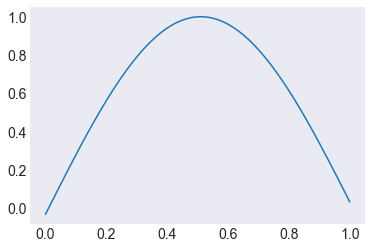

In [3]:
F = []
h = (b-a)/(N-1)
for n in range(N):
    F.append(sin((a + h*(n-1))*3.14/(b - a)))
fig = plt.figure()
plt.plot(np.linspace(a, b, N), F)

In [4]:
ksi = [0.,]
eta = [0.,]
Ai = c*g/h
Bi = 1 - c*g/h
Ci = c*g/h
for n in range(1, N):
    ksi.append(Ci / (Ai * ksi[n-1] + Bi))
    eta.append((F[n] - Ai * eta[n-1]) / (Ai * ksi[n-1] + Bi))
    

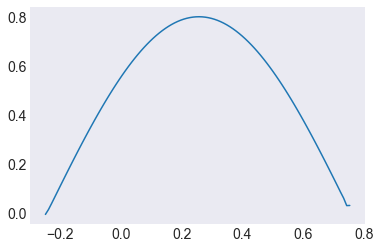

In [5]:
X = []
X.append((F[-1] - Ai * eta[-1])/(Bi + Ai * ksi[-1]))
for n in range(N-1, 0, -1):
    X.append(ksi[n]*X[-1] + eta[n])
X = X[::-1]
fig = plt.figure()
plt.plot(np.linspace(a+c*g/h, b+c*g/h, N), X)